Spettrogramma creato per: blues.00000_segment_0.wav in Data/images_original_3s/blues
Spettrogramma creato per: blues.00000_segment_1.wav in Data/images_original_3s/blues
Spettrogramma creato per: blues.00000_segment_2.wav in Data/images_original_3s/blues
Spettrogramma creato per: blues.00000_segment_3.wav in Data/images_original_3s/blues
Spettrogramma creato per: blues.00000_segment_4.wav in Data/images_original_3s/blues
Spettrogramma creato per: blues.00000_segment_5.wav in Data/images_original_3s/blues
Spettrogramma creato per: blues.00000_segment_6.wav in Data/images_original_3s/blues
Spettrogramma creato per: blues.00000_segment_7.wav in Data/images_original_3s/blues
Spettrogramma creato per: blues.00000_segment_8.wav in Data/images_original_3s/blues
Spettrogramma creato per: blues.00000_segment_9.wav in Data/images_original_3s/blues
Spettrogramma creato per: blues.00001_segment_0.wav in Data/images_original_3s/blues
Spettrogramma creato per: blues.00001_segment_1.wav in Data/image

MemoryError: Unable to allocate 521. KiB for an array with shape (1025, 130) and data type float32

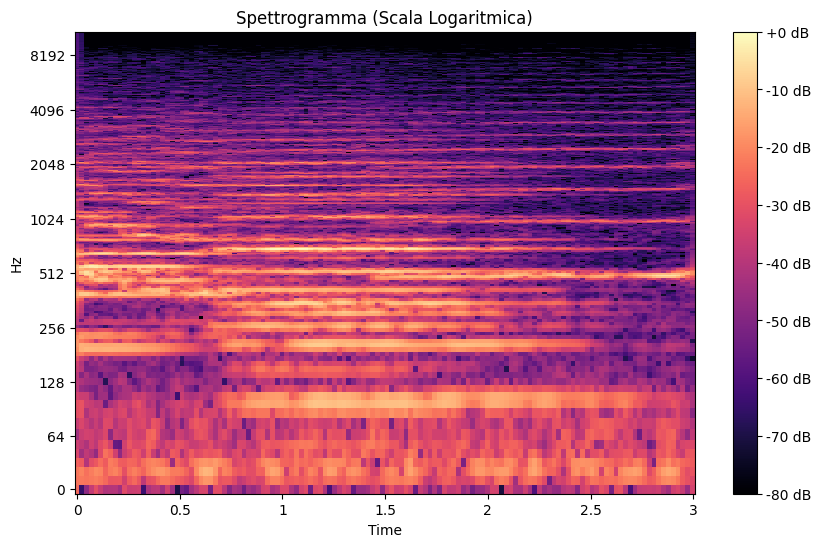

In [1]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Funzione per creare spettrogrammi
def create_spectrogram(file_path, output_folder):
    # Carica il file WAV
    y, sr = librosa.load(file_path, sr=None)

    # Calcola lo spettrogramma con la STFT
    S = librosa.stft(y)
    S_db = librosa.amplitude_to_db(np.abs(S), ref=np.max)

    # Crea il grafico dello spettrogramma
    plt.figure(figsize=(10, 6))
    librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spettrogramma (Scala Logaritmica)')
    
    # Nome del file di output
    file_name = os.path.splitext(os.path.basename(file_path))[0]
    output_path = os.path.join(output_folder, f"{file_name}_spectrogram.png")

    # Salva lo spettrogramma come immagine
    plt.savefig(output_path)
    plt.close()

# Lista dei generi musicali
genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

# Cartella con i file WAV suddivisi per genere musicale
input_folder = 'Data/genres_original_3s/'  # Modifica qui se necessario
output_folder = 'Data/images_original_3s/'  # Cartella principale per le immagini

# Crea la cartella di output principale se non esiste
os.makedirs(output_folder, exist_ok=True)

# Crea le cartelle di output per ogni genere
for genre in genres:
    genre_output_folder = os.path.join(output_folder, genre)  # Cartella per il genere dentro images_original_3s
    os.makedirs(genre_output_folder, exist_ok=True)  # Crea la cartella per il genere

# Ora popola le cartelle con gli spettrogrammi
for genre in genres:
    genre_input_folder = os.path.join(input_folder, genre)
    genre_output_folder = os.path.join(output_folder, genre)  # Cartella per il genere

    for file_name in os.listdir(genre_input_folder):
        if file_name.endswith('.wav'):
            file_path = os.path.join(genre_input_folder, file_name)
            
            # Crea lo spettrogramma e salvalo nella cartella del genere
            create_spectrogram(file_path, genre_output_folder)
            print(f"Spettrogramma creato per: {file_name} in {genre_output_folder}")
